In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
# Загрузка данных
D_clients = pd.read_csv('data\D_clients.csv')
D_close_loan = pd.read_csv('data\D_close_loan.csv')
D_job = pd.read_csv('data\D_job.csv')
D_last_credit = pd.read_csv('data\D_last_credit.csv')
D_loan = pd.read_csv('data\D_loan.csv')
D_pens = pd.read_csv('data\D_pens.csv')
D_salary = pd.read_csv('data\D_salary.csv')
D_target = pd.read_csv('data\D_target.csv')
D_work = pd.read_csv('data\D_work.csv')

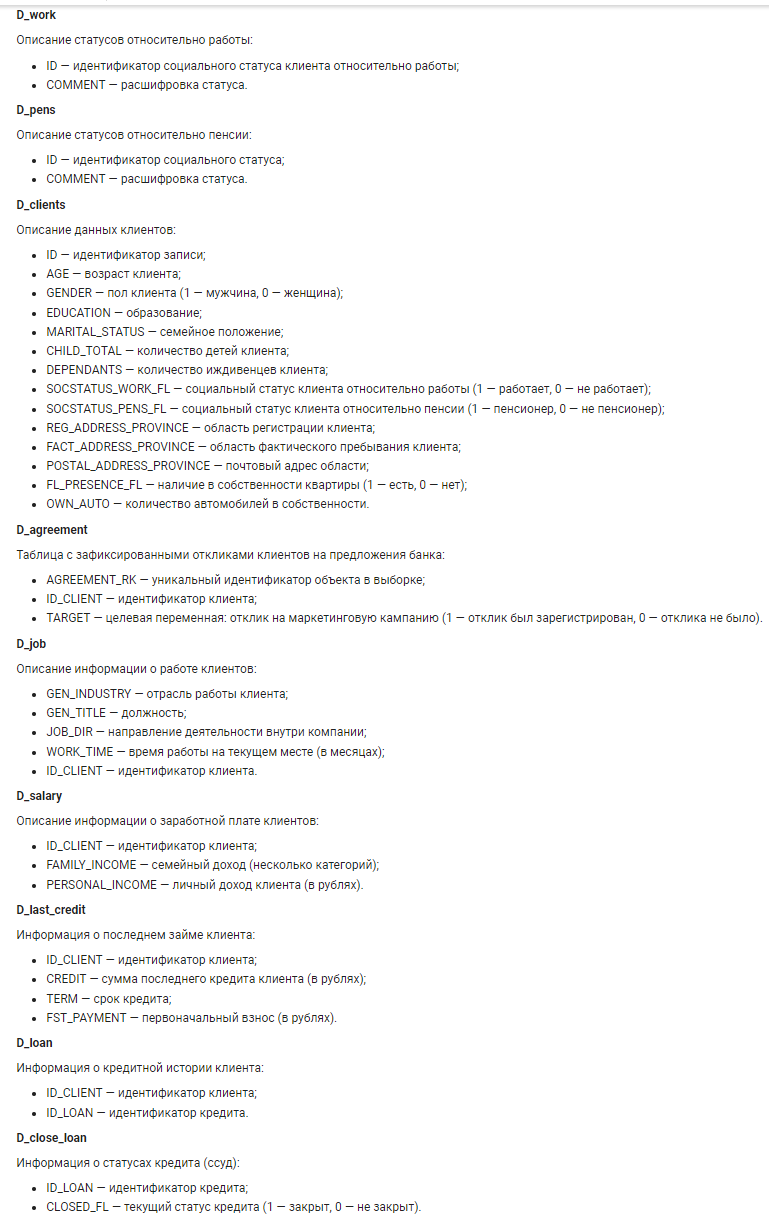

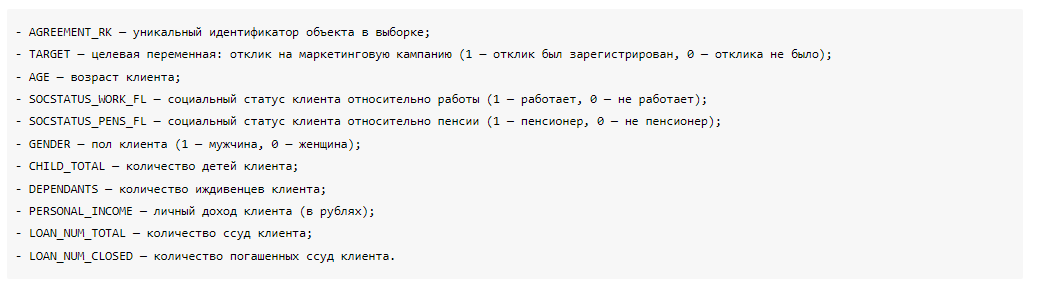

In [50]:
# Нам понадобится объеденить 5 таблиц: D_target, D_clients, D_salary, D_close_loan, D_loan

In [48]:
# В первую очередб объеденим таблицы с согласиями и клиентами
# Из таблицы с клиентами возьмем только необходимые столбцы

In [51]:
table_1 = D_target.merge(D_clients[['ID', 'AGE', 'SOCSTATUS_WORK_FL', 'SOCSTATUS_PENS_FL', 'GENDER', 'CHILD_TOTAL', 'DEPENDANTS']],
                                  left_on='ID_CLIENT', right_on='ID', how='left').drop('ID', axis=1)

In [52]:
table_1.head()

,AGREEMENT_RK,ID_CLIENT,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS
0,59910150,106804370,0,49,1,0,1,2,1
1,59910230,106804371,0,32,1,0,1,3,3
2,59910525,106804372,0,52,1,0,1,4,0
3,59910803,106804373,0,39,1,0,1,1,1
4,59911781,106804374,0,30,1,0,0,0,0


In [53]:
table_1.isna().sum()

AGREEMENT_RK         0
ID_CLIENT            0
TARGET               0
AGE                  0
SOCSTATUS_WORK_FL    0
SOCSTATUS_PENS_FL    0
GENDER               0
CHILD_TOTAL          0
DEPENDANTS           0
dtype: int64

In [ ]:
# Пустых значений нет, значит для каждого согласия присутствует информация о клиенте

In [54]:
# Добавим информацию о доходе из таблицы D_salary

In [55]:
table_2 = table_1.merge(D_salary[['ID_CLIENT', 'PERSONAL_INCOME']], on='ID_CLIENT', how='left')

In [56]:
table_2

,AGREEMENT_RK,ID_CLIENT,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME
0,59910150,106804370,0,49,1,0,1,2,1,5000.0
1,59910150,106804370,0,49,1,0,1,2,1,5000.0
2,59910230,106804371,0,32,1,0,1,3,3,12000.0
3,59910525,106804372,0,52,1,0,1,4,0,9000.0
4,59910803,106804373,0,39,1,0,1,1,1,25000.0
...,...,...,...,...,...,...,...,...,...,...
15518,75291424,106819588,0,25,1,0,0,1,1,12000.0
15519,75291888,106819589,0,51,1,0,1,2,0,10000.0
15520,75291923,106819590,0,22,1,0,1,1,1,6000.0
15521,75291960,106819591,0,60,0,1,1,2,0,4500.0


In [57]:
# Создадим таблицу с информацией о кредитах клиентов
# Для этого объединим D_loan и D_close_loan и для каждого пользователя посчитаем статистику

In [58]:
loan_df = D_loan.merge(D_close_loan, on='ID_LOAN', how='left')

In [59]:
loan_df

,ID_LOAN,ID_CLIENT,CLOSED_FL
0,1753790658,106804370,1
1,1753790659,106804371,1
2,1753790660,106804372,1
3,1753790661,106804372,0
4,1753790662,106804373,1
...,...,...,...
21121,1753811779,106819588,1
21122,1753811780,106819589,0
21123,1753811781,106819590,0
21124,1753811782,106819591,0


In [60]:
loan_df['LOAN_NUM_TOTAL'] = loan_df['CLOSED_FL']
loan_df['LOAN_NUM_CLOSED'] = loan_df['CLOSED_FL']

In [61]:
loan_df = loan_df.groupby('ID_CLIENT').aggregate({'LOAN_NUM_TOTAL':'count', 'LOAN_NUM_CLOSED':'sum'}).reset_index()

In [62]:
loan_df

,ID_CLIENT,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,106804370,1,1
1,106804371,1,1
2,106804372,2,1
3,106804373,1,1
4,106804374,2,1
...,...,...,...
15218,106819588,3,2
15219,106819589,1,0
15220,106819590,1,0
15221,106819591,1,0


In [63]:
# Теперь объединим оновную таблицу со статистикой клиентов по кредитам

In [64]:
data = table_2.merge(loan_df, on='ID_CLIENT', how='left')

In [65]:
data.drop('ID_CLIENT', axis=1, inplace=True)

In [66]:
# Итоговая таблица
data

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,59910150,0,49,1,0,1,2,1,5000.0,1,1
1,59910150,0,49,1,0,1,2,1,5000.0,1,1
2,59910230,0,32,1,0,1,3,3,12000.0,1,1
3,59910525,0,52,1,0,1,4,0,9000.0,2,1
4,59910803,0,39,1,0,1,1,1,25000.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
15518,75291424,0,25,1,0,0,1,1,12000.0,3,2
15519,75291888,0,51,1,0,1,2,0,10000.0,1,0
15520,75291923,0,22,1,0,1,1,1,6000.0,1,0
15521,75291960,0,60,0,1,1,2,0,4500.0,1,0


In [41]:
# Пропущенных значений нет, всего 15523 записи
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15523 entries, 0 to 15522
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AGREEMENT_RK       15523 non-null  int64  
 1   TARGET             15523 non-null  int64  
 2   AGE                15523 non-null  int64  
 3   SOCSTATUS_WORK_FL  15523 non-null  int64  
 4   SOCSTATUS_PENS_FL  15523 non-null  int64  
 5   GENDER             15523 non-null  int64  
 6   CHILD_TOTAL        15523 non-null  int64  
 7   DEPENDANTS         15523 non-null  int64  
 8   PERSONAL_INCOME    15523 non-null  float64
 9   LOAN_NUM_TOTAL     15523 non-null  int64  
 10  LOAN_NUM_CLOSED    15523 non-null  int64  
dtypes: float64(1), int64(10)
memory usage: 1.3 MB


In [67]:
# Количество уникальных id соглашений меньше общего количесвта строк, проверим, есть ли в данных дупликаты
data.nunique()

AGREEMENT_RK         15223
TARGET                   2
AGE                     47
SOCSTATUS_WORK_FL        2
SOCSTATUS_PENS_FL        2
GENDER                   2
CHILD_TOTAL             10
DEPENDANTS               8
PERSONAL_INCOME        274
LOAN_NUM_TOTAL           9
LOAN_NUM_CLOSED         10
dtype: int64

In [85]:
# В данных 300 задублированых записей
data.duplicated().sum()

300

In [87]:
# Удалим их
data = data.drop_duplicates().reset_index(drop=True)

In [90]:
data.shape

(15223, 11)

In [91]:
# Статистики по всем колонкам, кроме PERSONAL_INCOME выглядят адекватно. Проверим её на выбросы
data.describe()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
count,1.522300e+04,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000,15223.000000
mean,6.540183e+07,0.119030,40.406096,0.909610,0.134468,0.654536,1.099389,0.645208,13853.836323,1.387769,0.751889
std,4.568181e+06,0.323835,11.601068,0.286748,0.341165,0.475535,0.995411,0.812252,9015.467617,0.793566,0.988499
min,5.991015e+07,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.000000,1.000000,0.000000
25%,6.192092e+07,0.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000,1.000000,0.000000
50%,6.437100e+07,0.000000,39.000000,1.000000,0.000000,1.000000,1.000000,0.000000,12000.000000,1.000000,0.000000
75%,6.708802e+07,0.000000,50.000000,1.000000,0.000000,1.000000,2.000000,1.000000,17000.000000,2.000000,1.000000
max,7.529224e+07,1.000000,67.000000,1.000000,1.000000,1.000000,10.000000,7.000000,250000.000000,11.000000,11.000000


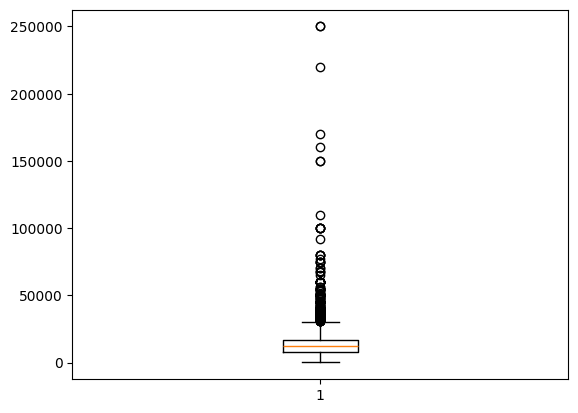

In [92]:
# Построим box plot для этого принака
# В данных безусловно присутвуют значения значительно отличающиеся от большинства показаний
# Будем считать выбросами значения свыше 25000
plt.boxplot(data['PERSONAL_INCOME'])
plt.show()

In [107]:
data.sort_values(by='PERSONAL_INCOME')

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
3491,61534026,0,28,1,0,0,1,1,24.0,1,0
9091,65421532,0,23,0,1,1,0,0,1950.0,1,1
9842,66528753,0,34,1,0,1,2,2,2000.0,2,2
4081,61964706,0,52,1,0,0,0,0,2000.0,1,0
5222,62382964,0,54,0,1,1,0,0,2100.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
11374,67082302,0,52,0,1,1,0,0,160000.0,2,2
144,59927525,0,56,1,0,1,0,0,170000.0,1,1
6276,62994542,0,49,1,0,0,1,2,220000.0,1,0
2726,61358155,0,53,1,0,0,2,0,250000.0,1,0


In [108]:
# Так же удалим подозрительно маленькое значение 24
data = data.loc[(data['PERSONAL_INCOME'] <= 25000) & (data['PERSONAL_INCOME'] >= 1000)]

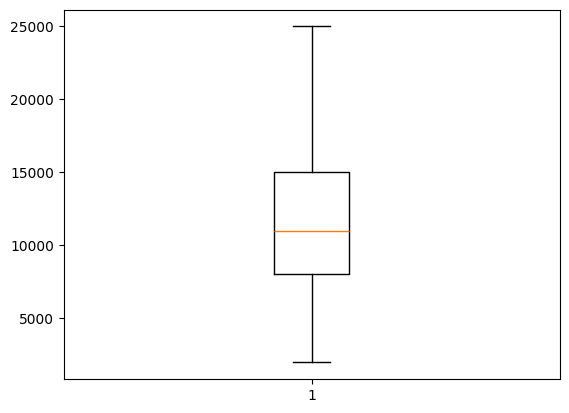

In [109]:
plt.boxplot(data['PERSONAL_INCOME'])
plt.show()

In [110]:
# Теперь проверим возраст пенсионеров

In [93]:
D_pens

,ID,FLAG,COMMENT
0,1,0,пенсионер
1,2,1,не пенсионер


In [115]:
data[data['SOCSTATUS_PENS_FL'] == 0][['AGE']].describe()

,AGE
count,12224.000000
mean,37.841378
std,10.081544
min,21.000000
25%,29.000000
50%,37.000000
75%,46.000000
max,67.000000


In [116]:
data[data['SOCSTATUS_PENS_FL'] == 1][['AGE']].describe()

,AGE
count,1982.000000
mean,56.967709
std,6.161463
min,22.000000
25%,55.000000
50%,58.000000
75%,61.000000
max,66.000000


In [118]:
# Судя по среднему возрасту флаги в таблице D_pens перепутаны

In [132]:
# Проверим не перепутаны ли они в таблице D_work
D_work

,ID,FLAG,COMMENT
0,1,0,работает
1,2,1,не работает
2,3,2,не известно


In [135]:
data[data['SOCSTATUS_WORK_FL'] == 0][['AGE']].describe()

,AGE
count,1366.000000
mean,57.115666
std,6.409912
min,22.000000
25%,55.000000
50%,58.000000
75%,61.000000
max,66.000000


In [136]:
data[data['SOCSTATUS_WORK_FL'] == 1][['AGE']].describe()

,AGE
count,12840.000000
mean,38.743224
std,10.695046
min,21.000000
25%,30.000000
50%,38.000000
75%,47.000000
max,67.000000


In [137]:
# Похоже, так же перепутаны

In [139]:
# Проверим сколько людей не достигших пенсионного возраста являются пенсионерами

In [141]:
data[(data['SOCSTATUS_PENS_FL'] == 1) & (data['AGE'] < 50)].shape

(157, 11)

In [ ]:
# Всего 157 из 1982 пенсионеров имеют возраст до 50. Возможно, это пенсионеры по инвалижности.
# В сочетании с возрастом этот признак может дать полезную информацию. Не будем отностить такие записи к выбросам
# Аналогично с не пенсионерами в пенсионном возрасте

In [142]:
# Теперь посмотрим на записи, где количество иждевенцев значительно превышает количество детей

In [143]:
data.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED
0,59910150,0,49,1,0,1,2,1,5000.0,1,1
1,59910230,0,32,1,0,1,3,3,12000.0,1,1
2,59910525,0,52,1,0,1,4,0,9000.0,2,1
3,59910803,0,39,1,0,1,1,1,25000.0,1,1
4,59911781,0,30,1,0,0,0,0,12000.0,2,1


In [149]:
data[(data['DEPENDANTS'] - data['CHILD_TOTAL']) >= 3]

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED


In [ ]:
# Таких записей нет

In [150]:
# В итоге получаем датасет состоящий из 14206 строк
data.shape

(14206, 11)

In [151]:
data.to_csv('data.csv', index=False)